In [26]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt 

In [4]:
dt = load_wine()

In [5]:
data = pd.DataFrame(dt.data, columns = dt.feature_names)
data['target'] = dt.target 

In [6]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
x = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values 

In [8]:
import torch 
import torch.nn as nn
import torch.nn.functional as f 

In [9]:
class Model(nn.Module):
    def __init__(self, inputs= 13, h1 = 9, h2 = 9, h3 = 9, classes = 3):
        super(Model, self).__init__()

        self.fc1 = nn.Linear(inputs, h1)
        self.fc2 = nn.Linear(h1, h2 )
        self.fc3 = nn.Linear(h2, h3)
        self.out = nn.Linear(h3, classes)
    def forward(self , x):

        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = f.relu(self.fc3(x))
        x = self.out(x)
        return x

In [10]:
torch.manual_seed(42)
model = Model()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [13]:
scaled = StandardScaler()
x_train_scaled  = scaled.fit_transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [14]:
x_train_scaled 

array([[ 1.66529275, -0.60840587,  1.21896194, ..., -1.65632857,
        -0.87940904, -0.24860607],
       [-0.54952506,  2.7515415 ,  1.00331502, ..., -0.58463272,
        -1.25462095, -0.72992237],
       [-0.74531007, -1.14354109, -0.93750727, ...,  0.35845962,
         0.2462267 , -0.24860607],
       ...,
       [ 1.714239  , -0.44172441,  0.06884503, ...,  1.04434496,
         0.56585166,  2.69572196],
       [-0.35374006, -0.7399965 , -0.36244882, ...,  0.01551695,
        -0.74044166, -0.79631083],
       [-0.78201975,  0.06709269,  0.35637426, ..., -0.67036839,
         1.09392769, -0.98551793]], shape=(142, 13))

In [15]:
x_test_scaled 

array([[ 8.08733375e-01,  6.37318741e-01,  7.15785791e-01,
        -1.24128036e+00,  1.06556722e+00,  6.46636689e-01,
         1.02724237e+00, -1.54932094e+00,  8.93605295e-02,
         1.82522280e-02,  1.55169482e-02,  1.06613421e+00,
         3.65487151e-01],
       [ 1.50621744e+00,  1.46195334e+00,  2.84491948e-01,
        -1.66513218e-01,  7.23080697e-01,  8.82684015e-01,
         6.47480801e-01, -5.32234717e-01, -6.15594759e-01,
         7.85270273e-02, -3.70293555e-01,  1.02444400e+00,
         1.14555151e+00],
       [-6.00625639e-02,  3.82910194e-01,  1.21896194e+00,
         4.43489751e-01, -3.04378866e-01, -1.17879597e+00,
        -1.50117016e+00,  1.26722552e+00, -1.47529633e+00,
        -1.97014913e-01, -7.98971892e-01, -3.93023224e-01,
        -4.47771435e-01],
       [ 9.18862438e-01, -7.66314624e-01,  1.21896194e+00,
         8.79206158e-01,  3.81076551e-02,  1.11873134e+00,
         1.24710433e+00, -6.10472119e-01,  1.32733079e+00,
         2.76572797e-01,  1.00147712e

In [16]:
x_train = torch.FloatTensor(x_train_scaled)
x_test  = torch.FloatTensor(x_test_scaled)


In [17]:
x_train

tensor([[ 1.6653, -0.6084,  1.2190,  ..., -1.6563, -0.8794, -0.2486],
        [-0.5495,  2.7515,  1.0033,  ..., -0.5846, -1.2546, -0.7299],
        [-0.7453, -1.1435, -0.9375,  ...,  0.3585,  0.2462, -0.2486],
        ...,
        [ 1.7142, -0.4417,  0.0688,  ...,  1.0443,  0.5659,  2.6957],
        [-0.3537, -0.7400, -0.3624,  ...,  0.0155, -0.7404, -0.7963],
        [-0.7820,  0.0671,  0.3564,  ..., -0.6704,  1.0939, -0.9855]])

In [18]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [19]:
y_train

tensor([2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0,
        2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1,
        2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2,
        2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2,
        1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1])

In [23]:
criterion  = nn.CrossEntropyLoss() #how close we are to the Y
optimizer = torch.optim.Adam(model.parameters(), lr= 0.01) #adjust the weight 
# parameters: the weight and the bias that we can change 

In [21]:
loss

CrossEntropyLoss()

In [24]:
epoch = 100 # One full pass through the entire training dataset by the model.
losses = []

for i in range(epoch):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item()) #.item() converts tensor → Python float

    if i % 10 == 0:
        print(f"Epoch {i} | loss: {loss: 4f}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    

Epoch 0 | loss:  1.064987
Epoch 10 | loss:  0.844864
Epoch 20 | loss:  0.480729
Epoch 30 | loss:  0.142224
Epoch 40 | loss:  0.025145
Epoch 50 | loss:  0.005327
Epoch 60 | loss:  0.002010
Epoch 70 | loss:  0.000826
Epoch 80 | loss:  0.000463
Epoch 90 | loss:  0.000339


Text(0.5, 1.0, 'Training loss Curve')

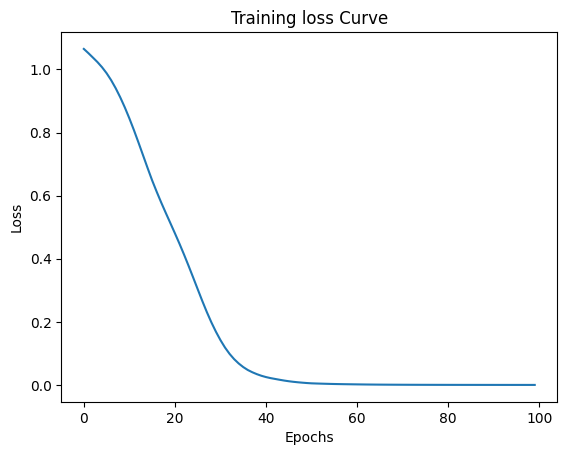

In [29]:
plt.plot(range(epoch), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training loss Curve")
